<a href="https://colab.research.google.com/github/hishamwqu/github-slideshow/blob/master/GWP_1_2_Student_A_EIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Collection and Analysis


  

In [ ]:
!pip install quandl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Packages

import quandl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime

In [ ]:
# Initializing Quandl
quand_api = 'ov5QsCHitgse8exey92t'
quandl.ApiConfig.api_key = quand_api

### Getting Crude oil Price Data

In [ ]:
# Pull WTI Crude Oil data from quandl
oil = pd.DataFrame(quandl.get("FRED/DCOILWTICO", start_date="2015-12-31", end_date="2020-04-21", collapse="daily"))
print(oil)
# Output DataFrame to CSV file
oil.to_csv("oil.csv", index=True)

            Value
Date             
2015-12-31  37.13
2016-01-04  36.81
2016-01-05  35.97
2016-01-06  33.97
2016-01-07  33.29
...           ...
2020-04-15  19.96
2020-04-16  19.82
2020-04-17  18.31
2020-04-20 -36.98
2020-04-21   8.91

[1078 rows x 1 columns]


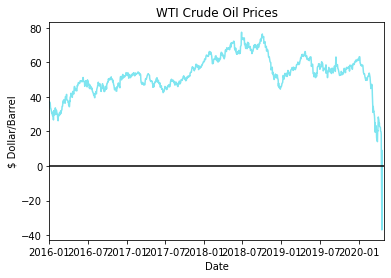

<Figure size 720x1080 with 0 Axes>

In [ ]:
# Plot initial data, with specific color
plt.plot(oil, color='#7FE5F0')
# Label and title adjustments
plt.xlabel('Date')
plt.ylabel('$ Dollar/Barrel')
plt.title('WTI Crude Oil Prices')
plt.axhline(0, color='black')
plt.xlim(datetime.date(2015, 12, 31),datetime.date(2020, 4, 30))
# Resizing and Saving Figure
fig = plt.gcf()
fig = figure(num=None, figsize=(10,15))
fig.savefig('WTICrude.png', dpi=100)

### Getting Unemployment Rate Data

In [ ]:
# Pull unemployment data
unemployment = pd.DataFrame(quandl.get("FRED/UNRATE", start_date="2000-12-31", end_date="2020-04-20"))
print(unemployment)
# Push DataFrame to CSV
unemployment.to_csv("unemployment.csv", index=True)

            Value
Date             
2001-01-01    4.2
2001-02-01    4.2
2001-03-01    4.3
2001-04-01    4.4
2001-05-01    4.3
...           ...
2019-12-01    3.6
2020-01-01    3.5
2020-02-01    3.5
2020-03-01    4.4
2020-04-01   14.7

[232 rows x 1 columns]


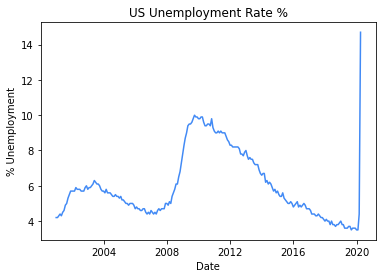

<Figure size 720x1080 with 0 Axes>

In [ ]:
plt.plot(unemployment, color='#428af5')
plt.xlabel('Date')
plt.ylabel('% Unemployment')
plt.title('US Unemployment Rate %')
fig = plt.gcf()
fig = figure(num=None, figsize =(10,15))
fig.savefig('USunemployment.png',dpi=100)

### Importing Data From EIA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement api_key (from versions: none)
ERROR: No matching distribution found for api_key
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apikey: filename=apikey-0.2.4-py3-none-any.whl size=6688 sha256=3a24b9197c13a04507de168485590899f63b2656b42c023c840ab5e3f7f6c45c
  Stored in directory: /root/.cache/pip/wheels/84/f9/f0/80eb346bcf71712c020eeb6ea637bd41ffd820e6b3cb3f24e7
Successfully built apikey


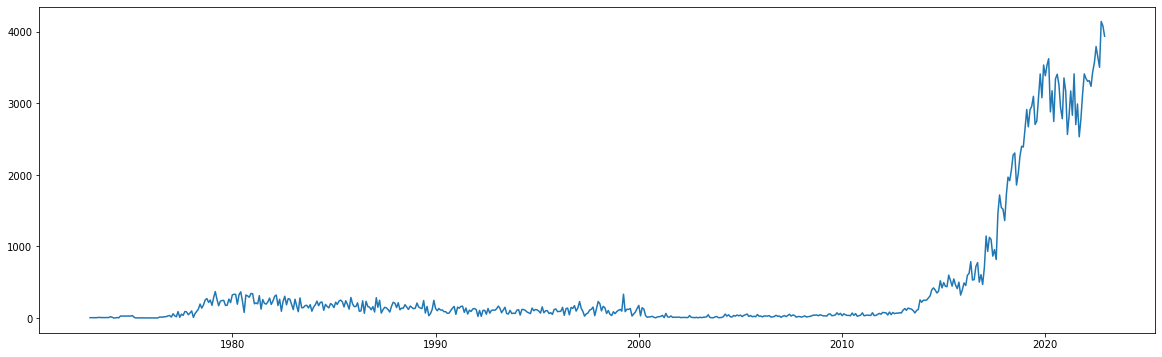

In [ ]:


## EIA Data
! pip install EIA-python
! pip install utils
! pip install api_key
! pip install apikey

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eia
import utils
import apikey

eia_key = "9UanLcBqg3VN6jPHhR32MOZA8Xr6nt9wA3HbFpHg";

eia_api = eia.API(eia_key);

eia_data = pd.DataFrame(eia_api.data_by_series(series='TOTAL.COEXPUS.M'));



import datetime # Using the datetime library

def convert_to_datetime(input):
        return datetime.datetime.strptime(input[:9], "%Y %m ").date();
# Apply to entire index
eia_data.index = eia_data.index.map(convert_to_datetime);
# Convert dataframe index to datetime64[ns] index
eia_data.index = pd.to_datetime(eia_data.index);
# pgmpy stores the column names as the variable name
eia_data.columns = ['TOTAL.COEXPUS.M'];

# Replace the '-' with np.nan
eia_data.replace('-', np.nan, regex=True, inplace=True);
# Backward fill the holes, by filling them with the data infront.
eia_data.fillna(method='bfill', inplace=True);

def clean_EIA(data):
        data.replace('-', np.nan, regex=True, inplace=True);
        data.fillna(method='bfill', inplace=True);
        data.index = data.index.map(convert_to_datetime);
        data.index = pd.to_datetime(data.index);


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6));
ax.plot(eia_data);

### Importing Data From FRED

In [ ]:
! pip install fredapi
from fredapi import Fred
# FRED API key
fred_key = "68938c119a4b1c2e24e2dd667bb4e95a";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_data = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
datasets_eia = [
                  #'STEO.RGDPQ_NONOECD.M',
                  #'STEO.RGDPQ_OECD.M',
                  'STEO.PAPR_NONOPEC.M',
                  'STEO.PAPR_OPEC.M',
                  'STEO.PATC_OECD.M',
                  'STEO.PATC_NON_OECD.M',
                  'STEO.COPRPUS.M',
                  'STEO.CORIPUS.M',
                  'PET.MCRIMXX2.M',
                  #'STEO.FOREX_WORLD.M',
                  'STEO.PASC_OECD_T3.M',
                  'STEO.COPS_OPEC.M',
                  'STEO.COPC_OPEC.M',
                  'STEO.T3_STCHANGE_OOECD.M',
                  'STEO.T3_STCHANGE_NOECD.M',
          ];

In [ ]:
datasets_fred = [
              'CPIENGSL',
              'CAPG211S',
              'CAPUTLG211S',
              'IPG211S',
              'IPG211111CN',
              'INDPRO',
              'IPN213111N',
              'PCU211211',
    ];

In [ ]:
data_merge = [];

In [ ]:
for series_id in datasets_eia: print(series_id)

STEO.PAPR_NONOPEC.M
STEO.PAPR_OPEC.M
STEO.PATC_OECD.M
STEO.PATC_NON_OECD.M
STEO.COPRPUS.M
STEO.CORIPUS.M
PET.MCRIMXX2.M
STEO.PASC_OECD_T3.M
STEO.COPS_OPEC.M
STEO.COPC_OPEC.M
STEO.T3_STCHANGE_OOECD.M
STEO.T3_STCHANGE_NOECD.M


In [ ]:

for series_id in datasets_eia:
    df= pd.DataFrame(eia_api.data_by_series(series=series_id));
    clean_EIA(df);
    df.columns = [series_id];
    data_merge.append(df);


In [ ]:

for series_id in datasets_fred:
        df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
        data_merge.append(df);

In [ ]:
datasets = datasets_eia + datasets_fred + ['WTISPLC', 'forecast'];

current =  pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1), 
                        columns=['forecast']);

data_merge.append(current);
data_merge.append(forecast);

In [ ]:
data = pd.concat(data_merge, axis=1, join='inner');

In [ ]:
train_data = data[: int(data.shape[0] * 0.80)];
vald_data = data[int(0.80 * data.shape[0]) : int(0.90 * data.shape[0])];
test_data = data[int(0.90* data.shape[0]) : int(data.shape[0])];

In [ ]:
train_data.corr()

,STEO.PAPR_NONOPEC.M,STEO.PAPR_OPEC.M,STEO.PATC_OECD.M,STEO.PATC_NON_OECD.M,STEO.COPRPUS.M,STEO.CORIPUS.M,PET.MCRIMXX2.M,STEO.PASC_OECD_T3.M,STEO.COPS_OPEC.M,STEO.COPC_OPEC.M,...,CPIENGSL,CAPG211S,CAPUTLG211S,IPG211S,IPG211111CN,INDPRO,IPN213111N,PCU211211,WTISPLC,forecast
STEO.PAPR_NONOPEC.M,1.000000,0.666483,-0.606759,0.951146,0.953366,0.555636,-0.886838,0.681804,0.063308,0.523825,...,0.372651,0.966465,0.587100,0.976978,0.952864,0.483977,-0.051199,-0.402915,0.049089,0.025023
STEO.PAPR_OPEC.M,0.666483,1.000000,-0.303380,0.736269,0.542878,0.330034,-0.447622,0.672426,-0.193384,0.685204,...,0.495545,0.618197,0.217349,0.596541,0.542542,0.544716,0.034679,-0.026041,0.233519,0.210683
STEO.PATC_OECD.M,-0.606759,-0.303380,1.000000,-0.687223,-0.513089,-0.066945,0.584658,-0.321683,-0.480160,-0.523586,...,-0.543393,-0.527791,-0.579271,-0.571632,-0.511757,0.032313,-0.115571,0.109735,-0.371120,-0.335867
STEO.PATC_NON_OECD.M,0.951146,0.736269,-0.687223,1.000000,0.847198,0.428773,-0.807080,0.670044,0.198844,0.684727,...,0.555218,0.885185,0.595187,0.900726,0.846390,0.433590,0.021617,-0.255651,0.241115,0.222917
STEO.COPRPUS.M,0.953366,0.542878,-0.513089,0.847198,1.000000,0.649472,-0.892830,0.617312,-0.112899,0.282279,...,0.181612,0.985135,0.557931,0.992175,0.999954,0.502469,-0.106743,-0.506602,-0.120322,-0.142252
STEO.CORIPUS.M,0.555636,0.330034,-0.066945,0.428773,0.649472,1.000000,-0.380957,0.491646,-0.415034,-0.061674,...,-0.158682,0.634459,0.256473,0.620940,0.649983,0.481922,-0.199064,-0.435262,-0.307056,-0.314904
PET.MCRIMXX2.M,-0.886838,-0.447622,0.584658,-0.807080,-0.892830,-0.380957,1.000000,-0.522021,-0.086034,-0.346604,...,-0.255146,-0.886443,-0.512231,-0.896963,-0.892197,-0.310015,0.063261,0.463757,0.046701,0.070292
STEO.PASC_OECD_T3.M,0.681804,0.672426,-0.321683,0.670044,0.617312,0.491646,-0.522021,1.000000,-0.012578,0.540978,...,-0.010413,0.704519,0.076748,0.648563,0.618625,0.170440,-0.523513,-0.563573,-0.314068,-0.325297
STEO.COPS_OPEC.M,0.063308,-0.193384,-0.480160,0.198844,-0.112899,-0.415034,-0.086034,-0.012578,1.000000,0.563678,...,0.310662,-0.106298,0.340509,-0.050966,-0.113986,-0.484048,0.018778,0.042994,0.312655,0.339295
STEO.COPC_OPEC.M,0.523825,0.685204,-0.523586,0.684727,0.282279,-0.061674,-0.346604,0.540978,0.563678,1.000000,...,0.593961,0.358571,0.343596,0.373200,0.281372,0.052535,-0.004250,0.037706,0.402743,0.404150


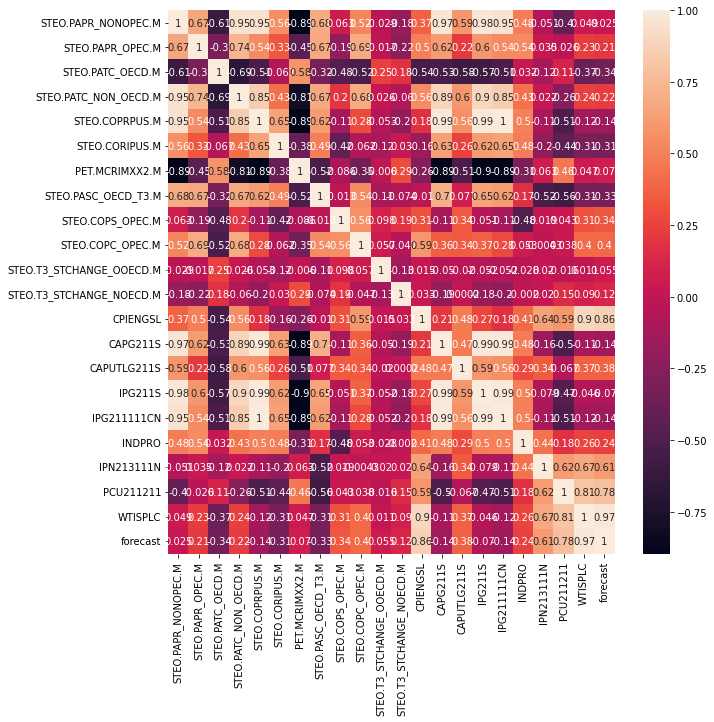

In [ ]:
# plotting correlation heatmap
import seaborn as sb
import matplotlib.pyplot as mp
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sb.heatmap(train_data.corr(), annot=True,annot_kws={'size': 10}, ax=ax)

  
# displaying heatmap
mp.show()

In [ ]:
###############################################################################################################

##################################################     Part 2      ################################

In [ ]:
!pip install "git+https://github.com/lopatovsky/HMMs.git"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lopatovsky/HMMs.git to /tmp/pip-req-build-x19zzi6h
  Running command git clone --filter=blob:none --quiet https://github.com/lopatovsky/HMMs.git /tmp/pip-req-build-x19zzi6h
  Resolved https://github.com/lopatovsky/HMMs.git to commit e33e9fff6227a74c641204ce7f1b86f84b23abda
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
  Created wheel for hmms: filename=hmms-0.1-cp38-cp38-linux_x86_64.whl size=2535609 sha256=16d8a20e91801edeabfe1eb68203c79f90006715230cca71db39ec33cead86d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-b0ojp707/wheels/9d/cf/67/5ade5baccf0ead6969297780d1e1117c53eb3d94f36f725be8
Successfully built hmms


In [ ]:
import hmms

In [ ]:
price = train_data['WTISPLC'];

In [ ]:
# The first value is NaN as there is not a previous month to compare with
price_diff = price.diff()[1:]; 

# Replacing the change with 1 if positive, else 0
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);

In [ ]:
dhmm_r = hmms.DtHMM.random(3 , 2); 

In [ ]:
e_seq = np.array_split(e_seq, 32);

##Baum-Welch Algorithm

In [ ]:
dhmm_r.baum_welch(e_seq, 100); # 100 iterations

iteration  1 / 100
iteration  2 / 100
iteration  3 / 100
iteration  4 / 100
iteration  5 / 100
iteration  6 / 100
iteration  7 / 100
iteration  8 / 100
iteration  9 / 100
iteration  10 / 100
iteration  11 / 100
iteration  12 / 100
iteration  13 / 100
iteration  14 / 100
iteration  15 / 100
iteration  16 / 100
iteration  17 / 100
iteration  18 / 100
iteration  19 / 100
iteration  20 / 100
iteration  21 / 100
iteration  22 / 100
iteration  23 / 100
iteration  24 / 100
iteration  25 / 100
iteration  26 / 100
iteration  27 / 100
iteration  28 / 100
iteration  29 / 100
iteration  30 / 100
iteration  31 / 100
iteration  32 / 100
iteration  33 / 100
iteration  34 / 100
iteration  35 / 100
iteration  36 / 100
iteration  37 / 100
iteration  38 / 100
iteration  39 / 100
iteration  40 / 100
iteration  41 / 100
iteration  42 / 100
iteration  43 / 100
iteration  44 / 100
iteration  45 / 100
iteration  46 / 100
iteration  47 / 100
iteration  48 / 100
iteration  49 / 100
iteration  50 / 100
iteration

In [ ]:
hmms.print_parameters( dhmm_r );

Initial probabilities (π) :


,0
0,0.127803
1,0.726127
2,0.146070


Transition probabilities matrix (A):


,0,1,2
0,0.566269,0.250033,0.183698
1,0.391869,0.114498,0.493633
2,0.304993,0.312269,0.382739


Emission probabilities matrix (B):


,0,1
0,0.148624,0.851376
1,0.356875,0.643125
2,0.713721,0.286279


## Viterbi Algorithm

In [ ]:
( log_prob, s_seq ) =  dhmm_r.viterbi(np.concatenate(e_seq).ravel());

<ipython-input-36-f3bb7beb3a9b>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ( log_prob, s_seq ) =  dhmm_r.viterbi(np.concatenate(e_seq).ravel());


## Multicolored time series plot

In [ ]:
# Add price
price_plot = pd.DataFrame(price[1:], index=price[1:].index); 

# Add a column representing the regime 
price_plot['Regime'] = s_seq; 

# Add a column representing the increase or decrease in price
price_plot['diff'] = price_diff; 

In [ ]:
# Get means of all assigned states
means = price_plot.groupby(['Regime'])['diff'].mean(); 
lst_1 = means.index.tolist();
lst_2 = means.sort_values().index.tolist();

map_regimes = dict(zip(lst_2, lst_1));

price_plot['Regime'] = price_plot['Regime'].map(map_regimes);

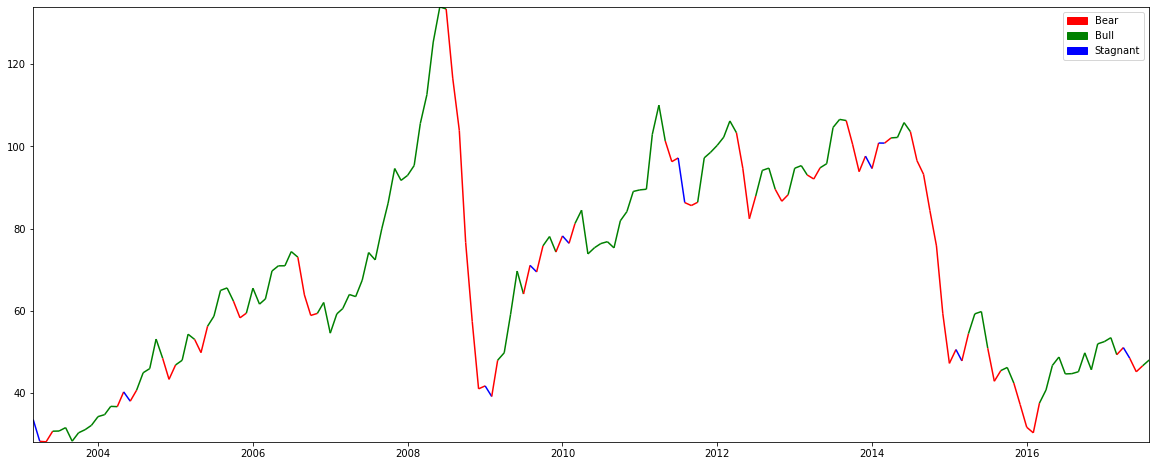

In [ ]:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm

fig, ax1 = plt.subplots(figsize=(20,8));
ax.plot(price_plot['WTISPLC']);

# Make 0 (Bear) - red, 1 (Stagnant) - blue, 2 (Bull) - green 

cmap   = ListedColormap(['r','b','g'],'indexed'); 
norm   = BoundaryNorm(range(3 + 1), cmap.N);
inxval = mdates.date2num(price_plot['WTISPLC'].index.to_pydatetime());
points = np.array([inxval, price_plot['WTISPLC']]).T.reshape(-1, 1, 2);
segments = np.concatenate([points[:-1], points[1:]], axis=1);

lc = LineCollection(segments, cmap=cmap, norm=norm);
lc.set_array(price_plot['Regime']);
plt.gca().add_collection(lc);
plt.xlim(price_plot['WTISPLC'].index.min(), price_plot['WTISPLC'].index.max());
plt.ylim(price_plot['WTISPLC'].min(), price_plot['WTISPLC'].max());

r_patch = mpatches.Patch(color='red', label='Bear');
g_patch = mpatches.Patch(color='green', label='Bull');
b_patch = mpatches.Patch(color='blue', label='Stagnant');

plt.legend(handles=[r_patch, g_patch, b_patch]);

plt.show();

## Discretising dataframes using Hidden Markov Models

In [ ]:
import os

# Create a directory for saving the file
save_dir = './hmms/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# Save the file to the directory 


In [ ]:
for series_id in datasets:
    if series_id == 'forecast':
        break;
    else:
        dhmm = hmms.DtHMM.random(3,2);
        data_diff =  train_data[series_id].diff()[1:];
        emit_seq = np.array_split(data_diff.apply(
                    lambda x: 1 if x > 0 else 0).values, 32);
        dhmm.baum_welch(emit_seq, 100);
        dhmm.save_params(os.path.join(save_dir, series_id.replace(".", "_")))
        # path = "./hmms/" + series_id.replace(".", "_");
        # dhmm.save_params(path);

iteration  1 / 100
iteration  2 / 100
iteration  3 / 100
iteration  4 / 100
iteration  5 / 100
iteration  6 / 100
iteration  7 / 100
iteration  8 / 100
iteration  9 / 100
iteration  10 / 100
iteration  11 / 100
iteration  12 / 100
iteration  13 / 100
iteration  14 / 100
iteration  15 / 100
iteration  16 / 100
iteration  17 / 100
iteration  18 / 100
iteration  19 / 100
iteration  20 / 100
iteration  21 / 100
iteration  22 / 100
iteration  23 / 100
iteration  24 / 100
iteration  25 / 100
iteration  26 / 100
iteration  27 / 100
iteration  28 / 100
iteration  29 / 100
iteration  30 / 100
iteration  31 / 100
iteration  32 / 100
iteration  33 / 100
iteration  34 / 100
iteration  35 / 100
iteration  36 / 100
iteration  37 / 100
iteration  38 / 100
iteration  39 / 100
iteration  40 / 100
iteration  41 / 100
iteration  42 / 100
iteration  43 / 100
iteration  44 / 100
iteration  45 / 100
iteration  46 / 100
iteration  47 / 100
iteration  48 / 100
iteration  49 / 100
iteration  50 / 100
iteration

Now, we shall be constructing the discretised training dataframe.

In [ ]:
# Testing

disc_test = pd.DataFrame(index = test_data[1:].index);

for series_id in datasets:
    path = "./hmms/" + series_id.replace(".", "_") + ".npz";
    if series_id == 'forecast':
        dhmm = hmms.DtHMM.from_file('./hmms/WTISPLC.npz');
    else:
        dhmm = hmms.DtHMM.from_file(path);
    data_diff =  test_data[series_id].diff()[1:];
    emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values);
    ( log_prob, s_seq ) =  dhmm.viterbi(emit_seq);
    disc_test[series_id] = s_seq;

<ipython-input-42-3c9335ade0d0>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ( log_prob, s_seq ) =  dhmm.viterbi(emit_seq);


In [ ]:
disc_test

,STEO.PAPR_NONOPEC.M,STEO.PAPR_OPEC.M,STEO.PATC_OECD.M,STEO.PATC_NON_OECD.M,STEO.COPRPUS.M,STEO.CORIPUS.M,PET.MCRIMXX2.M,STEO.PASC_OECD_T3.M,STEO.COPS_OPEC.M,STEO.COPC_OPEC.M,...,CPIENGSL,CAPG211S,CAPUTLG211S,IPG211S,IPG211111CN,INDPRO,IPN213111N,PCU211211,WTISPLC,forecast
2019-08-01,1,0,1,2,1,1,0,1,0,2,...,0,2,2,1,0,0,1,2,2,1
2019-09-01,2,1,0,1,0,2,2,2,2,1,...,2,2,0,1,2,0,0,0,0,2
2019-10-01,0,1,1,2,0,0,1,1,1,2,...,1,2,0,1,1,0,1,2,0,0
2019-11-01,0,1,1,0,0,1,0,1,1,0,...,1,2,1,0,1,0,0,0,1,1
2019-12-01,1,1,0,1,0,1,0,2,1,0,...,1,2,0,1,1,0,2,2,1,2
2020-01-01,1,1,1,2,0,2,1,1,1,2,...,2,2,1,0,1,0,2,1,2,2
2020-02-01,2,1,0,2,0,0,0,2,0,1,...,2,2,1,2,0,0,2,2,2,2
2020-03-01,0,2,1,2,0,0,2,1,2,2,...,2,1,0,2,2,0,0,1,2,2
2020-04-01,1,2,0,0,0,0,1,1,0,1,...,2,1,1,2,1,0,1,2,2,0
2020-05-01,2,2,1,1,0,1,0,1,2,1,...,2,1,1,0,0,2,0,0,0,1


In [ ]:
train_data.isna().sum()

STEO.PAPR_NONOPEC.M         0
STEO.PAPR_OPEC.M            0
STEO.PATC_OECD.M            0
STEO.PATC_NON_OECD.M        0
STEO.COPRPUS.M              0
STEO.CORIPUS.M              0
PET.MCRIMXX2.M              0
STEO.PASC_OECD_T3.M         0
STEO.COPS_OPEC.M            0
STEO.COPC_OPEC.M            0
STEO.T3_STCHANGE_OOECD.M    0
STEO.T3_STCHANGE_NOECD.M    0
CPIENGSL                    0
CAPG211S                    0
CAPUTLG211S                 0
IPG211S                     0
IPG211111CN                 0
INDPRO                      0
IPN213111N                  0
PCU211211                   0
WTISPLC                     0
forecast                    0
dtype: int64

In [ ]:

disc_test.to_csv('train_data.csv')

In [ ]:

from google.colab import files


Now, we shall be plotting this data to see how well the trained HMMs predicted regimes on the valdiation dataset.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

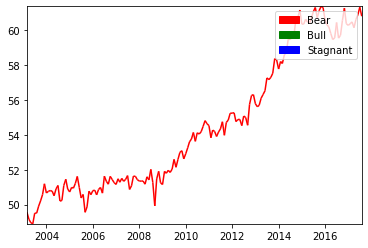

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

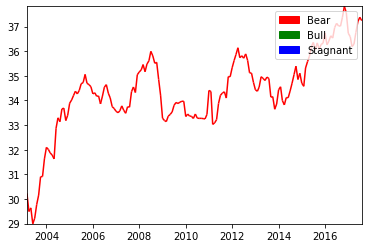

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

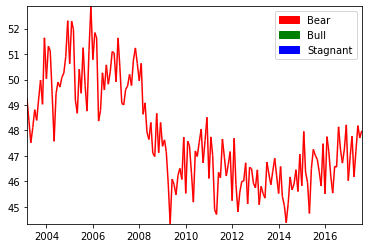

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

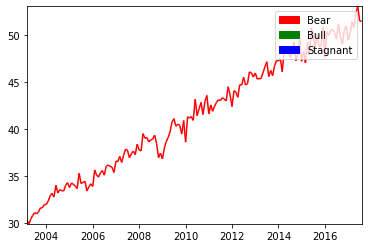

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

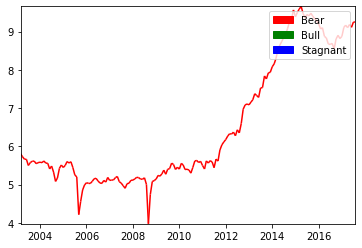

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

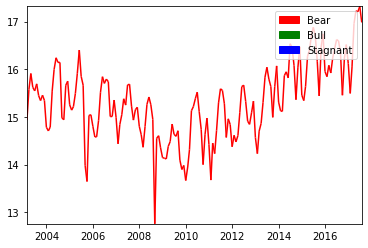

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

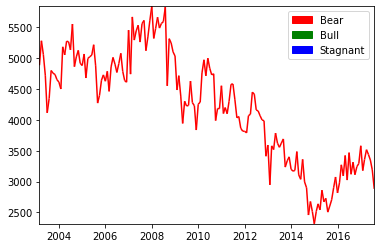

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

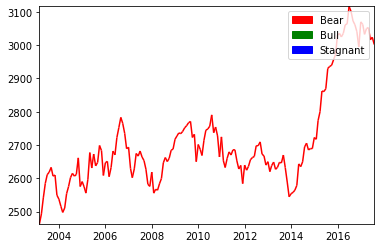

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

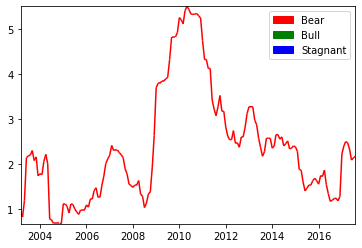

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

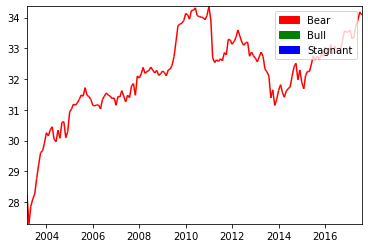

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

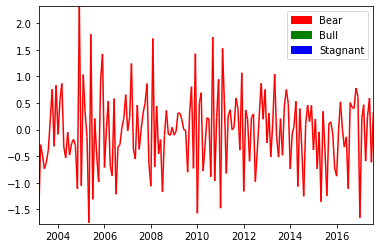

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

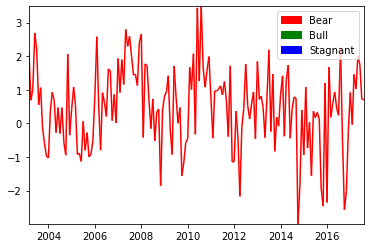

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

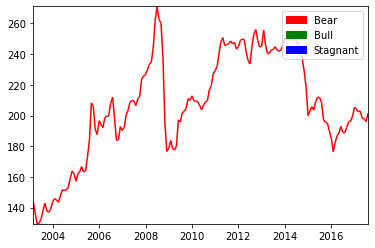

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

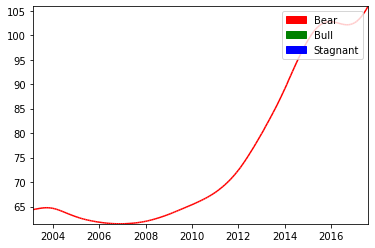

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

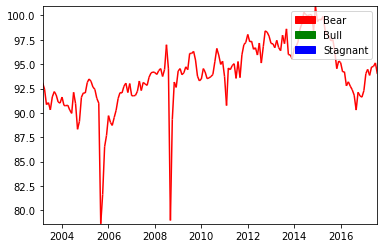

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

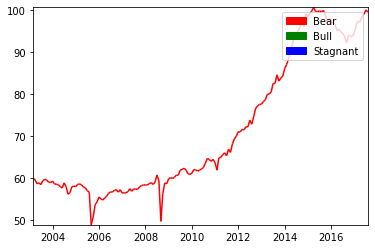

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

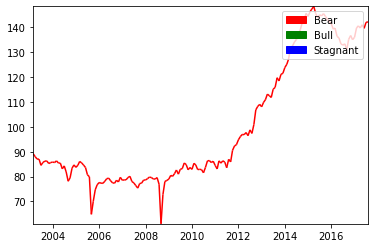

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

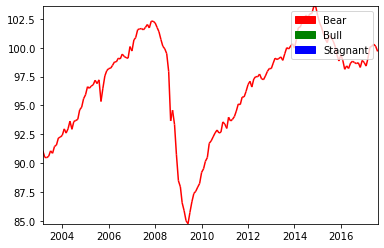

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

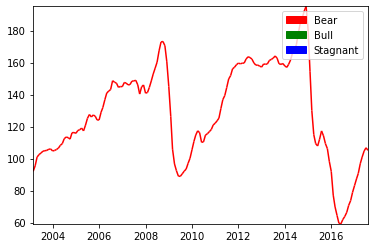

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

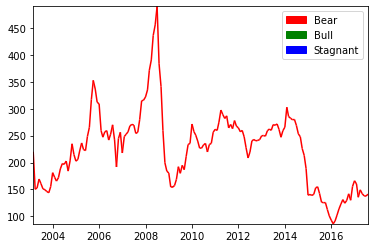

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

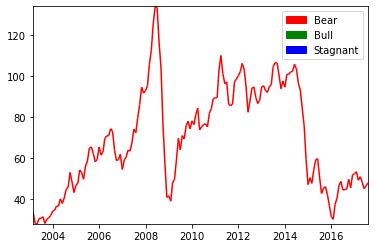

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

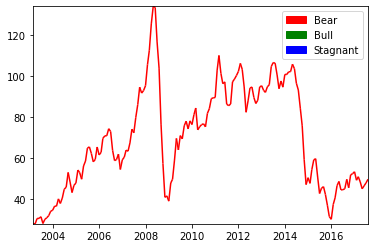

In [ ]:
states = pd.read_csv("train_data.csv", index_col=0);

for series_id in datasets:
    
        df = pd.DataFrame(index=train_data[1:].index);
        df[series_id] = train_data[series_id][1:];
        df['Diff'] = train_data[series_id].diff()[1:];
        df['Regime'] = states[series_id];
        
        # Get means of all assigned states
        means = df.groupby(['Regime'])['Diff'].mean(); 
        lst_1 = means.index.tolist();
        lst_2 = means.sort_values().index.tolist();

        map_regimes = dict(zip(lst_2, lst_1));
        df['Regime'] = df['Regime'].map(map_regimes);
        
        
        cmap   = ListedColormap(['r','b','g'],'indexed');
        norm   = BoundaryNorm(range(3 + 1), cmap.N);
        inxval = mdates.date2num(df[series_id].index.to_pydatetime());
        points = np.array([inxval, df[series_id]]).T.reshape(-1, 1, 2);
        segments = np.concatenate([points[:-1], points[1:]], axis=1);

        lc = LineCollection(segments, cmap=cmap, norm=norm);
        lc.set_array(df['Regime']);
        plt.gca().add_collection(lc);
        plt.xlim(df[series_id].index.min(), df[series_id].index.max());
        plt.ylim(df[series_id].min(), df[series_id].max());

        r_patch = mpatches.Patch(color='red', label='Bear');
        g_patch = mpatches.Patch(color='green', label='Bull');
        b_patch = mpatches.Patch(color='blue', label='Stagnant');

        plt.legend(handles=[r_patch, g_patch, b_patch]);

        name = series_id.replace(".", "_") + ".png";

        plt.savefig(name) 
        files.download(name);
        plt.show()
        plt.close();

In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.0 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianModel, BayesianNetwork as bn
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BicScore, K2Score,BDeuScore

# Retrieve training set
train_data = pd.read_csv("train_data.csv", index_col=0); 



1. Do estimate using hill climb
2. Check the nodes from estimate
3. Implement bayesian network for fit using these nodes
4. Predict on predict data

In [ ]:
est = HillClimbSearch(train_data)
best_model = est.estimate(scoring_method=BicScore(train_data))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
nodes = sorted(best_model.nodes())

In [ ]:
edges_ = best_model.edges()

### search a model with restriction on the number of parents:

In [ ]:
est.estimate(max_indegree=1).edges()

  0%|          | 0/1000000 [00:00<?, ?it/s]

OutEdgeView([('STEO.PAPR_NONOPEC.M', 'IPG211111CN'), ('STEO.PAPR_NONOPEC.M', 'PET.MCRIMXX2.M'), ('STEO.PATC_NON_OECD.M', 'STEO.PAPR_NONOPEC.M'), ('STEO.PATC_NON_OECD.M', 'CAPG211S'), ('STEO.PATC_NON_OECD.M', 'PCU211211'), ('STEO.PATC_NON_OECD.M', 'STEO.PATC_OECD.M'), ('PET.MCRIMXX2.M', 'STEO.T3_STCHANGE_NOECD.M'), ('STEO.PASC_OECD_T3.M', 'IPN213111N'), ('STEO.PASC_OECD_T3.M', 'STEO.COPS_OPEC.M'), ('CAPG211S', 'INDPRO'), ('CAPG211S', 'STEO.T3_STCHANGE_OOECD.M'), ('CAPUTLG211S', 'STEO.PAPR_OPEC.M'), ('CAPUTLG211S', 'STEO.COPC_OPEC.M'), ('IPG211S', 'CAPUTLG211S'), ('IPG211S', 'CPIENGSL'), ('IPG211111CN', 'STEO.PASC_OECD_T3.M'), ('IPG211111CN', 'STEO.COPRPUS.M'), ('IPG211111CN', 'IPG211S'), ('PCU211211', 'WTISPLC'), ('WTISPLC', 'forecast'), ('forecast', 'STEO.CORIPUS.M')])

In [ ]:
nodes

['CAPG211S',
 'CAPUTLG211S',
 'CPIENGSL',
 'INDPRO',
 'IPG211111CN',
 'IPG211S',
 'IPN213111N',
 'PCU211211',
 'PET.MCRIMXX2.M',
 'STEO.COPC_OPEC.M',
 'STEO.COPRPUS.M',
 'STEO.COPS_OPEC.M',
 'STEO.CORIPUS.M',
 'STEO.PAPR_NONOPEC.M',
 'STEO.PAPR_OPEC.M',
 'STEO.PASC_OECD_T3.M',
 'STEO.PATC_NON_OECD.M',
 'STEO.PATC_OECD.M',
 'STEO.T3_STCHANGE_NOECD.M',
 'STEO.T3_STCHANGE_OOECD.M',
 'WTISPLC',
 'forecast']

In [ ]:
edges_

OutEdgeView([('STEO.PAPR_NONOPEC.M', 'STEO.PATC_NON_OECD.M'), ('STEO.PAPR_OPEC.M', 'STEO.PASC_OECD_T3.M'), ('STEO.PAPR_OPEC.M', 'STEO.COPS_OPEC.M'), ('STEO.PASC_OECD_T3.M', 'IPG211111CN'), ('STEO.PASC_OECD_T3.M', 'IPN213111N'), ('STEO.COPS_OPEC.M', 'CAPG211S'), ('CPIENGSL', 'IPG211S'), ('CAPG211S', 'STEO.T3_STCHANGE_OOECD.M'), ('CAPG211S', 'INDPRO'), ('CAPUTLG211S', 'STEO.PAPR_OPEC.M'), ('CAPUTLG211S', 'STEO.COPC_OPEC.M'), ('IPG211S', 'CAPUTLG211S'), ('IPG211111CN', 'STEO.PAPR_NONOPEC.M'), ('IPG211111CN', 'STEO.COPRPUS.M'), ('PCU211211', 'WTISPLC'), ('WTISPLC', 'forecast'), ('WTISPLC', 'CPIENGSL'), ('forecast', 'STEO.CORIPUS.M')])

In [ ]:
#  Initialise Hill Climbing Estimator

expert =  bn();
expert.add_nodes_from(nodes);
expert.add_edges_from(
edges_
    # [
    #                     ('STEO.PAPR_NONOPEC.M', 'WTISPLC'), 
    #                     ('STEO.PAPR_OPEC.M', 'WTISPLC'),
    #                     ('STEO.PATC_OECD.M', 'WTISPLC'),
    #                     ('STEO.PATC_NON_OECD.M', 'WTISPLC'),
    #                     ('STEO.RGDPQ_OECD.M', 'STEO.PATC_OECD.M'),
    #                     ('STEO.RGDPQ_NONOECD.M', 'STEO.PATC_NON_OECD.M'),
    #                   ]
                      
                      ); 



In [ ]:
expert.fit(train_data)

In [ ]:
#expert.predict(test_data#)

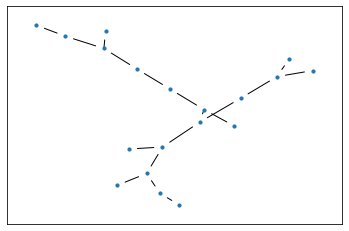

<Figure size 1440x720 with 0 Axes>

In [ ]:
import networkx as nx
import pylab as plt


G=nx.Graph();
G.add_edges_from(best_model.edges());
pos = nx.spring_layout(G);
nx.draw_networkx_nodes(G, pos, node_size = 10);
nx.draw_networkx_edges(G, pos, arrows=True);
plt.figure(5,figsize=(20,10));